In [7]:
import datetime
import os.path
import pickle
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning.ml_utils import available_indices, extract_data
%matplotlib inline

In [10]:
# linear regression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# machine learning methods
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [11]:
# Load data
DATA_FOLDER = os.path.join("data_cleaning", "data")
def path(filename):
    return os.path.join(DATA_FOLDER, filename)

orig_full_data = np.load(path("full_np_data.pickle.npy"))
inter_full_data = np.load(path("linear_inter.pickle.npy"))
spline_full_data = np.load(path("spline_inter.pickle.npy"))
orig_dates = np.load(path("dates.pickle.npy"))
names = pickle.load(open(path("filenames.pickle"), "rb"))

In [12]:
# Select date for predictions
start_date = datetime.date(day=3, month=1, year=2007)
end_date = datetime.date(day=3, month=1, year=2009)

In [16]:
# Get data and valid measurements indices
inds, data = extract_data(orig_dates, start_date, end_date, inter_full_data)
inds2, data_spline = extract_data(orig_dates, start_date, end_date, spline_full_data)
assert inds == inds2
print("Available indices: ", inds)
print(np.array(names)[inds])

Available indices:  [9, 24, 33, 38, 42, 45, 46, 47]
['data/raw/85012.csv' 'data/raw/85030.csv' 'data/raw/85040.csv'
 'data/raw/85050.csv' 'data/raw/85054.csv' 'data/raw/85063.csv'
 'data/raw/85064.csv' 'data/raw/85065.csv']


24106


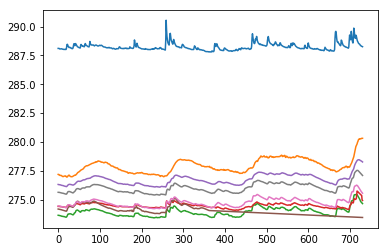

In [24]:
# Plot (linearly intrpolated) data acquired in that date range
print(len(inter_full_data[inds[2]]))
for part in data:
    plt.plot(part)
    

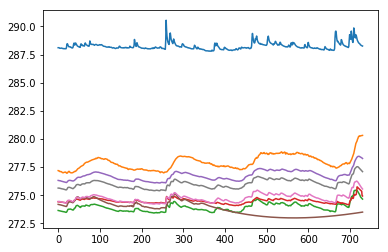

In [25]:
for part in data_spline:
    plt.plot(part)

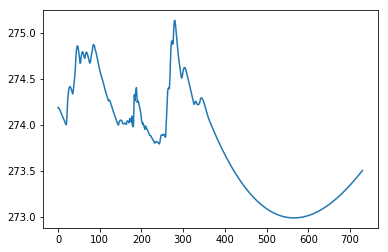

In [34]:
plt.plot(data_spline[5])
# Fifth one is bad -> Remove it
bad_indices = [5]

In [42]:
# Do machine learning
regressor = linear_model.LinearRegression()
for real in range(len(inds)):
    if real in bad_indices:
        continue
    input_inds = [j for j in range(len(data)) if j != real and j not in bad_indices]
    input_data = np.array([data[j] for j in input_inds])
    predicted_inter = cross_val_predict(regressor, input_data.T,data[real], cv = 10);
    input_data = np.array([data_spline[j] for j in input_inds])
    predicted_spline = cross_val_predict(regressor, input_data.T,data_spline[real], cv = 10);
    print(real, inds[real])
    print("val: linear | spline")
    print("r2 :", "{0:1.4f} |".format(r2_score(data[real], predicted_inter)), "{0:1.4f}".format(r2_score(data[real], predicted_spline)))
    print("mse:", "{0:1.4f} |".format(mean_squared_error(data[real], predicted_inter)), "{0:1.4f}".format(mean_squared_error(data[real], predicted_spline)))
    print("mae:", "{0:1.4f} |".format(mean_absolute_error(data[real], predicted_inter)), "{0:1.4f}".format(mean_absolute_error(data[real], predicted_spline)))

0 9
val: linear | spline
r2 : 0.6243 | 0.6243
mse: 0.0382 | 0.0382
mae: 0.1215 | 0.1215
1 24
val: linear | spline
r2 : 0.9735 | 0.9735
mse: 0.0110 | 0.0110
mae: 0.0816 | 0.0816
2 33
val: linear | spline
r2 : 0.9918 | 0.9918
mse: 0.0012 | 0.0012
mae: 0.0273 | 0.0273
3 38
val: linear | spline
r2 : 0.4979 | 0.4979
mse: 0.0271 | 0.0271
mae: 0.1328 | 0.1328
4 42
val: linear | spline
r2 : 0.9957 | 0.9957
mse: 0.0009 | 0.0009
mae: 0.0211 | 0.0211
6 46
val: linear | spline
r2 : 0.9957 | 0.9957
mse: 0.0006 | 0.0006
mae: 0.0192 | 0.0192
7 47
val: linear | spline
r2 : 0.9956 | 0.9956
mse: 0.0008 | 0.0008
mae: 0.0211 | 0.0211
